In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from plotly import tools
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import time

In [2]:
# read data
df = pd.read_csv('EUR_USD Consolidated Data.csv', index_col='Date',parse_dates=['Date'])
df

,Open,High,Low,Close,Adj Close,EUR I/R,US Fed Rate,US Headline CPI,US Core CPI,EUR Headline CPI,EUR Core CPI,US GDP Per Capita,US Current Acc Bal,EUR Current Acc Bal,US Terms of Trade,EU Terms of Trade,EUR Unemployment Rate,US Unemployment Rate
Date,,,,,,,,,,,,,,,,,,
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,1.75,0.095714,217.488,220.633,92.32,93.52,47797.0,-86832.0,10150.0,92.010,98.649861,9.997619,9.8
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,1.75,0.095714,217.488,220.633,92.32,93.52,47797.0,-86832.0,10150.0,92.010,98.649861,9.997619,9.8
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,1.75,0.095714,217.488,220.633,92.32,93.52,47797.0,-86832.0,10150.0,92.010,98.649861,9.997619,9.8
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,1.75,0.095714,217.488,220.633,92.32,93.52,47797.0,-86832.0,10150.0,92.010,98.649861,9.997619,9.8
2010-01-07,1.440300,1.444481,1.430206,1.431803,1.431803,1.75,0.095714,217.488,220.633,92.32,93.52,47797.0,-86832.0,10150.0,92.010,98.649861,9.997619,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,1.090667,1.092180,1.088815,1.090667,1.090667,4.25,5.071429,303.841,308.309,123.15,119.48,80781.0,-218801.0,77030.0,108.216,96.093069,6.453621,3.6
2023-06-27,1.091048,1.097610,1.090322,1.091048,1.091048,4.25,5.071429,303.841,308.309,123.15,119.48,80781.0,-218801.0,77030.0,108.216,96.093069,6.453621,3.6
2023-06-28,1.095722,1.096251,1.089966,1.095722,1.095722,4.25,5.071429,303.841,308.309,123.15,119.48,80781.0,-218801.0,77030.0,108.216,96.093069,6.453621,3.6


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,EUR I/R,US Fed Rate,US Headline CPI,US Core CPI,EUR Headline CPI,EUR Core CPI,US GDP Per Capita,US Current Acc Bal,EUR Current Acc Bal,US Terms of Trade,EU Terms of Trade,EUR Unemployment Rate,US Unemployment Rate
count,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000
mean,1.202199,1.206384,1.197765,1.202176,1.202176,0.847341,0.787472,247.774096,252.071185,102.580176,101.835762,60287.866894,-127496.749716,64364.928896,99.047658,98.807984,9.432754,6.006911
std,0.113999,0.114481,0.113623,0.113936,0.113936,0.854795,1.145665,22.084952,23.027558,6.764358,5.722900,8939.387461,51923.643357,43021.177405,5.008845,1.858897,1.752065,2.255497
min,0.959619,0.967006,0.760572,0.959619,0.959619,0.250000,0.045714,217.199000,220.633000,91.570000,92.300000,47797.000000,-258277.000000,-34380.000000,91.603000,96.093069,6.400128,3.400000
25%,1.112489,1.116000,1.108540,1.112520,1.112520,0.250000,0.090000,232.445000,232.996000,98.830000,98.050000,52816.000000,-133695.000000,33220.000000,94.295000,96.755555,7.861542,4.000000
50%,1.176416,1.179272,1.172828,1.176325,1.176325,0.300000,0.157143,241.176000,248.842000,100.685000,101.000000,58144.000000,-107374.000000,67930.000000,99.554000,99.649867,9.890301,5.300000
75%,1.306033,1.310099,1.300845,1.305905,1.305905,1.500000,1.160000,257.803000,265.924000,105.130000,105.060000,65473.000000,-92852.000000,102570.000000,101.916000,100.191851,10.932347,7.800000
max,1.484296,1.493808,1.480494,1.484406,1.484406,4.250000,5.080000,303.841000,308.309000,123.470000,119.910000,80781.000000,-69195.000000,139730.000000,109.384000,101.739967,12.185582,14.700000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3516 entries, 2010-01-01 to 2023-06-30
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   3516 non-null   float64
 1   High                   3516 non-null   float64
 2   Low                    3516 non-null   float64
 3   Close                  3516 non-null   float64
 4   Adj Close              3516 non-null   float64
 5   EUR I/R                3516 non-null   float64
 6   US Fed Rate            3516 non-null   float64
 7   US Headline CPI        3516 non-null   float64
 8   US Core CPI            3516 non-null   float64
 9   EUR Headline CPI       3516 non-null   float64
 10  EUR Core CPI           3516 non-null   float64
 11  US GDP Per Capita      3516 non-null   float64
 12  US Current Acc Bal     3516 non-null   float64
 13  EUR Current Acc Bal    3516 non-null   float64
 14  US Terms of Trade      3516 non-null  

In [5]:
rates = df[['Adj Close']]
rates

,Adj Close
Date,
2010-01-01,1.438994
2010-01-04,1.442398
2010-01-05,1.436596
2010-01-06,1.440403
2010-01-07,1.431803
...,...
2023-06-26,1.090667
2023-06-27,1.091048
2023-06-28,1.095722


In [6]:
rates.rename(columns={'Adj Close':'Rates'},inplace=True)
rates

/var/folders/ps/ypptn4xx5858gdv_767yb6vh0000gn/T/ipykernel_56421/2820750488.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rates
Date,
2010-01-01,1.438994
2010-01-04,1.442398
2010-01-05,1.436596
2010-01-06,1.440403
2010-01-07,1.431803
...,...
2023-06-26,1.090667
2023-06-27,1.091048
2023-06-28,1.095722


<Axes: xlabel='Date', ylabel='Rates'>

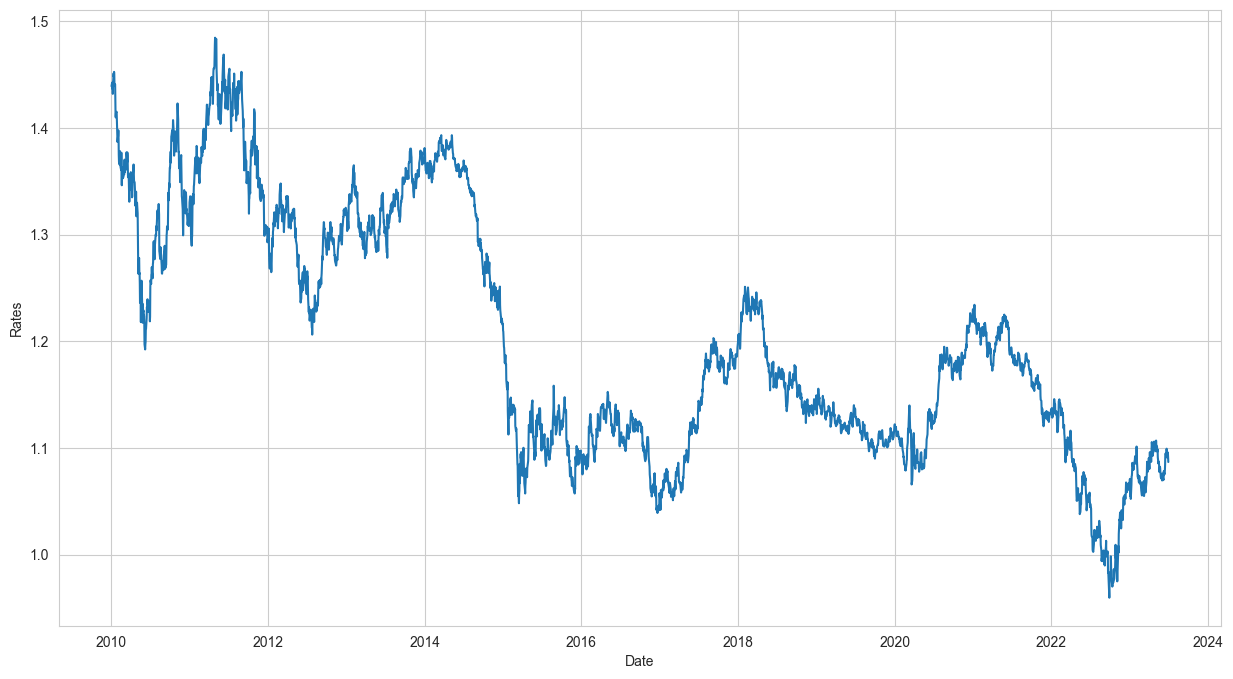

In [7]:
# plot time series
plt.figure(figsize=(15,8))
sns.lineplot(x=rates.index, y=rates.Rates)

<Figure size 1500x800 with 0 Axes>

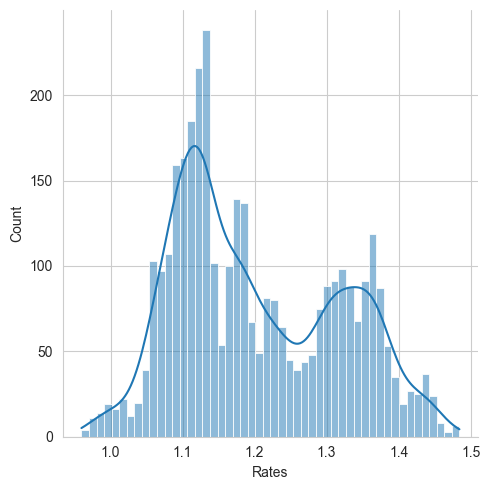

In [8]:
# plot distplot
plt.figure(figsize=(15,8))
sns.displot(rates.Rates, bins=50, kde=True)

In [9]:
rates.Rates

Date
2010-01-01    1.438994
2010-01-04    1.442398
2010-01-05    1.436596
2010-01-06    1.440403
2010-01-07    1.431803
                ...   
2023-06-26    1.090667
2023-06-27    1.091048
2023-06-28    1.095722
2023-06-29    1.091584
2023-06-30    1.086803
Name: Rates, Length: 3516, dtype: float64

In [10]:
dataset = rates.Rates.values
dataset = dataset.reshape(-1,1)

In [11]:
dataset

array([[1.438994],
       [1.442398],
       [1.436596],
       ...,
       [1.095722],
       [1.091584],
       [1.086803]])

In [12]:
# normalising the data
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [13]:
# split into train and test sets
train_size = int(len(dataset) * 0.86)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

3023 493


In [14]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [15]:
dataset

array([[0.91346584],
       [0.91995229],
       [0.90889637],
       ...,
       [0.25934903],
       [0.25146393],
       [0.24235356]])

In [16]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [17]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [18]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
3021/3021 - 2s - loss: 0.0144 - 2s/epoch - 526us/step
Epoch 2/100
3021/3021 - 1s - loss: 1.9202e-04 - 1s/epoch - 377us/step
Epoch 3/100
3021/3021 - 1s - loss: 2.0062e-04 - 1s/epoch - 378us/step
Epoch 4/100
3021/3021 - 1s - loss: 2.0118e-04 - 1s/epoch - 380us/step
Epoch 5/100
3021/3021 - 1s - loss: 1.9911e-04 - 1s/epoch - 376us/step
Epoch 6/100
3021/3021 - 1s - loss: 1.9704e-04 - 1s/epoch - 376us/step
Epoch 7/100
3021/3021 - 1s - loss: 2.0173e-04 - 1s/epoch - 376us/step
Epoch 8/100
3021/3021 - 1s - loss: 1.9493e-04 - 1s/epoch - 381us/step
Epoch 9/100
3021/3021 - 1s - loss: 2.0116e-04 - 1s/epoch - 377us/step
Epoch 10/100
3021/3021 - 1s - loss: 1.9829e-04 - 1s/epoch - 376us/step
Epoch 11/100
3021/3021 - 1s - loss: 1.9653e-04 - 1s/epoch - 379us/step
Epoch 12/100
3021/3021 - 1s - loss: 1.9913e-04 - 1s/epoch - 385us/step
Epoch 13/100
3021/3021 - 1s - loss: 2.0032e-04 - 1s/epoch - 378us/step
Epoch 14/100
3021/3021 - 1s - loss: 2.0018e-04 - 1s/epoch - 382us/step
Epoch 15/100
3021/3

In [20]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_absolute_percentage_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f MAPE' % (trainScore))
mae = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Test MAE: %.2f' % mae)
testScore = np.sqrt(mean_absolute_percentage_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MAPE' % (testScore))

16/16 [==============================] - 0s 389us/step
Train Score: 0.07 MAPE
Test MAE: 0.01
Test Score: 0.07 MAPE


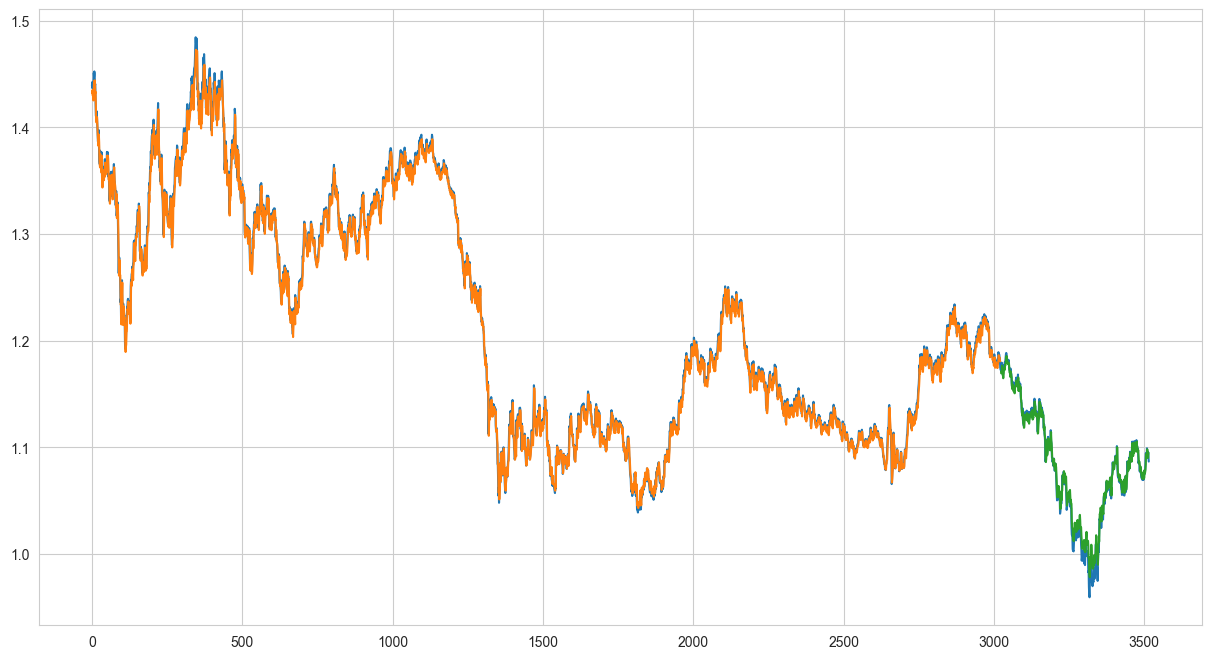

In [21]:
plt.figure(figsize=(15,8))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()